In [6]:
# =====================================
# DS2: Pollution Risk Prediction (Custom for Cities1.csv)
# =====================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib



In [7]:
# -------------------------
# 1. Load Data
# -------------------------
who = pd.read_csv(r"D:\workshop 2025\project\datasets\ds2\WHO_PM.csv")
cities = pd.read_csv(r"D:\workshop 2025\project\datasets\ds2\Cities1.csv")

print("WHO data sample:")
print(who.head(), "\n")
print("Cities data sample:")
print(cities.head(), "\n")



WHO data sample:
  IndicatorCode                                          Indicator ValueType  \
0       SDGPM25  Concentrations of fine particulate matter (PM2.5)      text   
1       SDGPM25  Concentrations of fine particulate matter (PM2.5)      text   
2       SDGPM25  Concentrations of fine particulate matter (PM2.5)      text   
3       SDGPM25  Concentrations of fine particulate matter (PM2.5)      text   
4       SDGPM25  Concentrations of fine particulate matter (PM2.5)      text   

  ParentLocationCode ParentLocation Location type SpatialDimValueCode  \
0                AFR         Africa       Country                 KEN   
1                AMR       Americas       Country                 TTO   
2                EUR         Europe       Country                 GBR   
3                AMR       Americas       Country                 GRD   
4                AMR       Americas       Country                 BRA   

                                            Location Period typ

In [8]:
# -------------------------
# 2. Define pollutant columns
# -------------------------
pollutant_cols = ["AirQuality", "WaterPollution"]

# Convert to numeric (safety check)
cities[pollutant_cols] = cities[pollutant_cols].apply(pd.to_numeric, errors="coerce")


In [9]:
# -------------------------
# 3. Label RiskLevel
# -------------------------
# Since WHO_PM.csv does not match directly, we’ll create simple thresholds:
# - Low (0): both values <= 40
# - Moderate (1): either value between 40–70
# - High (2): either value > 70

def classify_risk(row):
    aq = row["AirQuality"]
    wp = row["WaterPollution"]
    if aq > 70 or wp > 70:
        return 2
    elif aq > 40 or wp > 40:
        return 1
    else:
        return 0

cities["RiskLevel"] = cities.apply(classify_risk, axis=1)

print("RiskLevel distribution:")
print(cities["RiskLevel"].value_counts(), "\n")


RiskLevel distribution:
RiskLevel
2    2444
1    1412
0     107
Name: count, dtype: int64 



In [10]:
# -------------------------
# 4. Train-Test Split
# -------------------------
X = cities[pollutant_cols]
y = cities["RiskLevel"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [11]:
# -------------------------
# 5. Train Model
# -------------------------
model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False



Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00       283
           2       1.00      1.00      1.00       489

    accuracy                           1.00       793
   macro avg       1.00      1.00      1.00       793
weighted avg       1.00      1.00      1.00       793



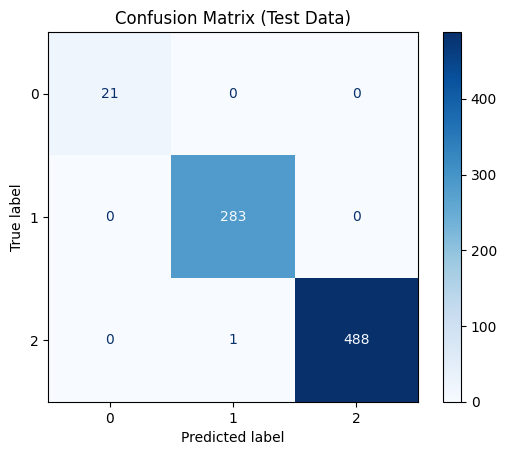

In [12]:
# -------------------------
# 6. Evaluation
# -------------------------
y_pred = model.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Test Data)")
plt.show()


In [13]:
# -------------------------
# 7. Save Model
# -------------------------
joblib.dump(model, "pollution_risk_model.pkl")
print("✅ Model saved as pollution_risk_model.pkl")

✅ Model saved as pollution_risk_model.pkl
